In [41]:
%pylab inline

import pandas as pd

from soln.dataset import get_augmented_train_and_test_set

%time aug_train_set, aug_test_set = get_augmented_train_and_test_set()
print aug_train_set.shape
print aug_test_set.shape
aug_train_set.info()

Populating the interactive namespace from numpy and matplotlib
CPU times: user 6.94 s, sys: 0 ns, total: 6.94 s
Wall time: 6.94 s
(30213, 31)
(30235, 29)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30213 entries, 0 to 30212
Data columns (total 31 columns):
tube_assembly_id      30213 non-null object
supplier              30213 non-null object
quote_date            30213 non-null object
annual_usage          30213 non-null int64
min_order_quantity    30213 non-null int64
bracket_pricing       30213 non-null bool
quantity              30213 non-null int64
log_cost              30213 non-null float64
material_id           29984 non-null object
diameter              30213 non-null float64
wall_thickness        30213 non-null float64
length                30213 non-null float64
num_bends             30213 non-null int64
bend_radius           30213 non-null float64
end_a_1x              30213 non-null bool
end_a_2x              30213 non-null bool
end_x_1x              30213 non-null b

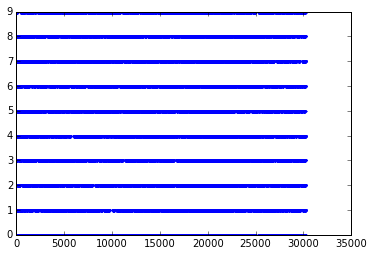

In [22]:
# Check that dev_fold is properly shuffled.
plot(aug_train_set.dev_fold.values, '.')

In [23]:
# Check that the folds have roughly equal sizes.
aug_train_set.dev_fold.value_counts()

1    3141
3    3121
8    3110
5    3013
9    2997
7    2995
2    2983
6    2965
4    2945
0    2943
dtype: int64

In [27]:
# Check that no taid occurs in more than one fold.
taid_to_fold = {}
arr = aug_train_set[['tube_assembly_id', 'dev_fold']].values
assert arr.shape == (len(aug_train_set), 2)
for taid, fold in arr:
    if taid in taid_to_fold:
        if taid_to_fold[taid] != fold:
            print "found taid {} with multiple folds".format(taid)
    else:
        taid_to_fold[taid] = fold
print "done"

done


In [28]:
df = aug_train_set[['tube_assembly_id', 'adj_quantity', 'bracketing_pattern']]
df[500:520]

,tube_assembly_id,adj_quantity,bracketing_pattern
500,TA-00222,5,"(1, 2, 5, 10, 25, 50, 100, 250)"
501,TA-00222,10,"(1, 2, 5, 10, 25, 50, 100, 250)"
502,TA-00222,25,"(1, 2, 5, 10, 25, 50, 100, 250)"
503,TA-00222,50,"(1, 2, 5, 10, 25, 50, 100, 250)"
504,TA-00222,100,"(1, 2, 5, 10, 25, 50, 100, 250)"
505,TA-00222,250,"(1, 2, 5, 10, 25, 50, 100, 250)"
506,TA-00228,1,"(1, 10)"
507,TA-00228,10,"(1, 10)"
508,TA-00229,5,()
509,TA-00230,1,()


In [37]:
aug_train_set.dev_fold.value_counts()

9    4695
0    3902
1    3819
2    3769
3    2959
8    2925
4    2781
5    1918
6    1856
7    1589
dtype: int64

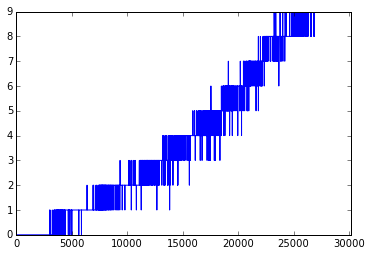

In [41]:
aug_train_set.dev_fold.plot()

In [44]:
from soln.dataset import generate_xv_splits

split = next(generate_xv_splits(aug_train_set))
X_train, y_train, X_test, y_test = split
print aug_train_set.shape
print [thing.shape for thing in split]

(30213, 30)
[(26311, 28), (26311,), (3902, 28), (3902,)]


In [56]:
from soln.dataset import AllCategoricalsFeaturizer

featurizer = AllCategoricalsFeaturizer(keep_orig_feats=True)
%time featurizer.fit(X_train)
%time X_train_feats = featurizer.transform(X_train)
X_train_feats.info(verbose=True)

CPU times: user 452 ms, sys: 0 ns, total: 452 ms
Wall time: 470 ms
CPU times: user 644 ms, sys: 200 ms, total: 844 ms
Wall time: 864 ms
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26311 entries, 0 to 26310
Data columns (total 448 columns):
tube_assembly_id                                      object
supplier                                              object
quote_date                                            object
annual_usage                                          int64
min_order_quantity                                    int64
bracket_pricing                                       bool
quantity                                              int64
material_id                                           object
diameter                                              float64
wall_thickness                                        float64
length                                                float64
num_bends                                             int64
bend_radius              

In [57]:
X_train_feats['components C-1312'].value_counts()

0    23201
2     3024
1       86
dtype: int64

In [34]:
# Verify that the 'id' column in test_set.csv is equal to the row number (1-based).
from soln.dataset import load_raw_data
raw = load_raw_data()
id_col = raw['test_set']['id'].values
np.all(id_col - 1 == np.arange(30235))

True

In [46]:
# Check 'ends' feature.
df = aug_train_set[['tube_assembly_id', 'end_a', 'end_x', 'ends']]
df[-10:]

,tube_assembly_id,end_a,end_x,ends
30203,TA-21189,EF-018,NONE,"(EF-018, NONE)"
30204,TA-21189,EF-018,NONE,"(EF-018, NONE)"
30205,TA-21189,EF-018,NONE,"(EF-018, NONE)"
30206,TA-21189,EF-018,NONE,"(EF-018, NONE)"
30207,TA-21189,EF-018,NONE,"(EF-018, NONE)"
30208,TA-21190,EF-003,EF-018,"(EF-003, EF-018)"
30209,TA-21191,EF-003,EF-018,"(EF-003, EF-018)"
30210,TA-21195,EF-003,EF-009,"(EF-003, EF-009)"
30211,TA-21196,EF-003,EF-017,"(EF-003, EF-017)"
30212,TA-21197,EF-003,EF-017,"(EF-003, EF-017)"


In [37]:
df = pd.DataFrame()
df['a'] = ['x', 'y', 'z']
df['b'] = ['1', '2', '3']
df

,a,b
0,x,1
1,y,2
2,z,3


In [40]:
list(zip(df.a.values, df.b.values))

[('x', '1'), ('y', '2'), ('z', '3')]